# Making Time Series Stationary

Kaggle: https://www.kaggle.com/datasets/rakannimer/air-passengers

How to make non-stationary TS a stationary TS:
* Differencing
* Rolling statistics
* Transformation

Basicaly we should make TS stationary before using ML model on it

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller

In [2]:
df = pd.read_csv('../data/data_ts/AirPassengers.csv')

In [3]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [5]:
df.shape

(144, 2)

In [6]:
df.isna().sum()

Month          0
#Passengers    0
dtype: int64

<AxesSubplot:>

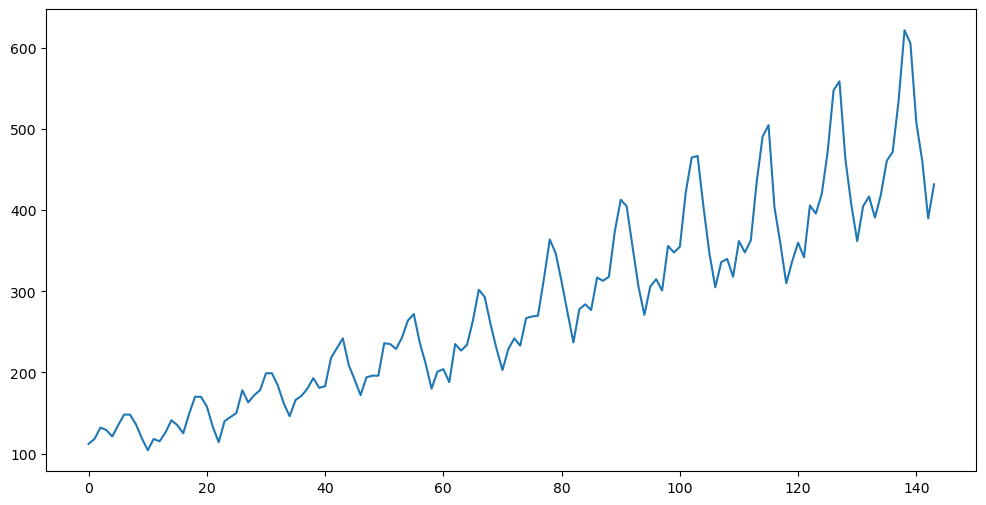

In [7]:
plt.rcParams.update({'figure.figsize': (12,6)})
df['#Passengers'].plot()

# Method 1 - Differencing and Seasonal differencing

## Differencing: y(t) = y(t) - y(t-1)

In [8]:
df['#Passengers_diff'] = df['#Passengers'] - df['#Passengers'].shift(1)

In [9]:
df['#Passengers_diff'].head()

0     NaN
1     6.0
2    14.0
3    -3.0
4    -8.0
Name: #Passengers_diff, dtype: float64

<AxesSubplot:>

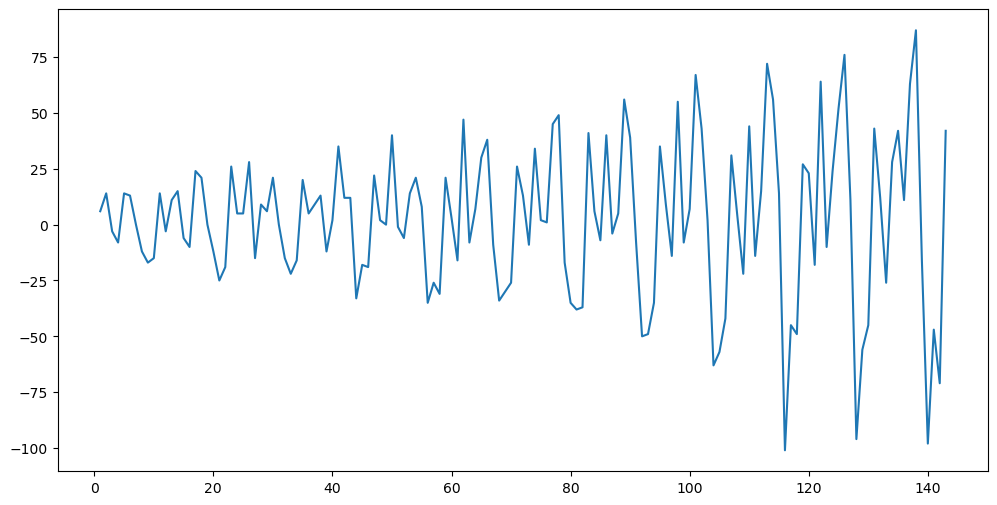

In [10]:
df['#Passengers_diff'].dropna().plot()

## Seasonal differencing: y(t) = y(t) - y(t-n)

In [11]:
df['#Passengers_diff_7'] = df['#Passengers'] - df['#Passengers'].shift(7)

<AxesSubplot:>

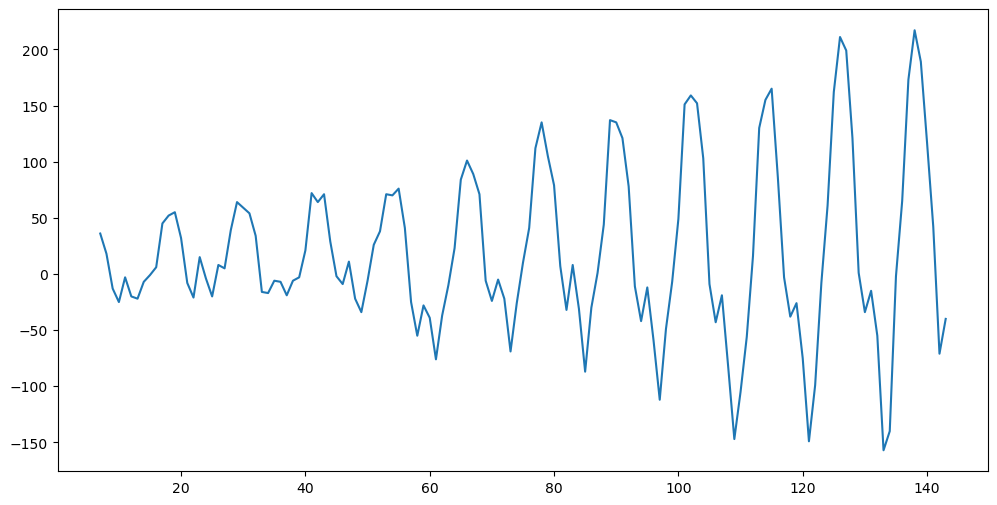

In [12]:
df['#Passengers_diff_7'].dropna().plot()

In [13]:
df['#Passengers_diff_12'] = df['#Passengers'] - df['#Passengers'].shift(12)

<AxesSubplot:>

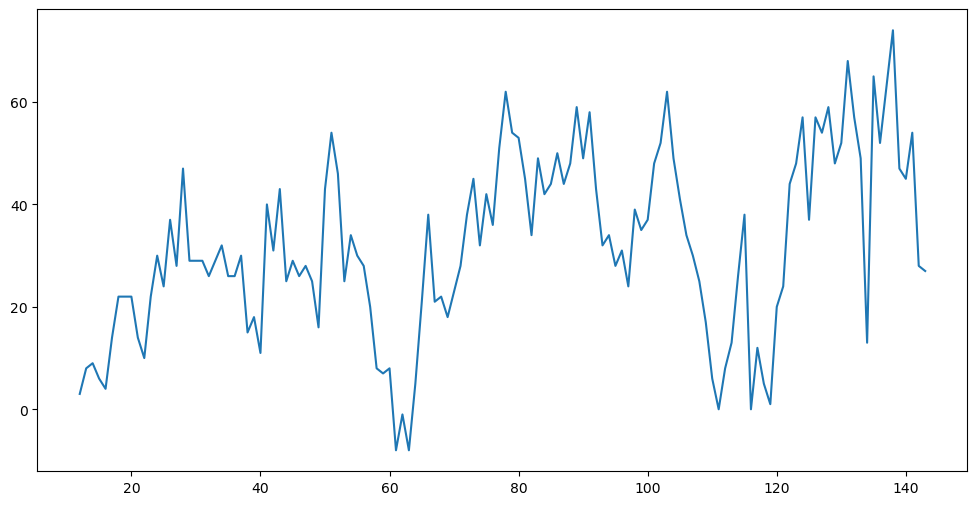

In [14]:
df['#Passengers_diff_12'].dropna().plot()

# Method 2 - Transformation

In [15]:
# Calculate the log
df['adj_log'] = np.log(df['#Passengers'])

# Calculate the square root
df['adj_sqrt'] = np.sqrt(df['#Passengers'])

# Calculate the cubed root
df['adj_cbrt'] = np.cbrt(df['#Passengers'])

<AxesSubplot:>

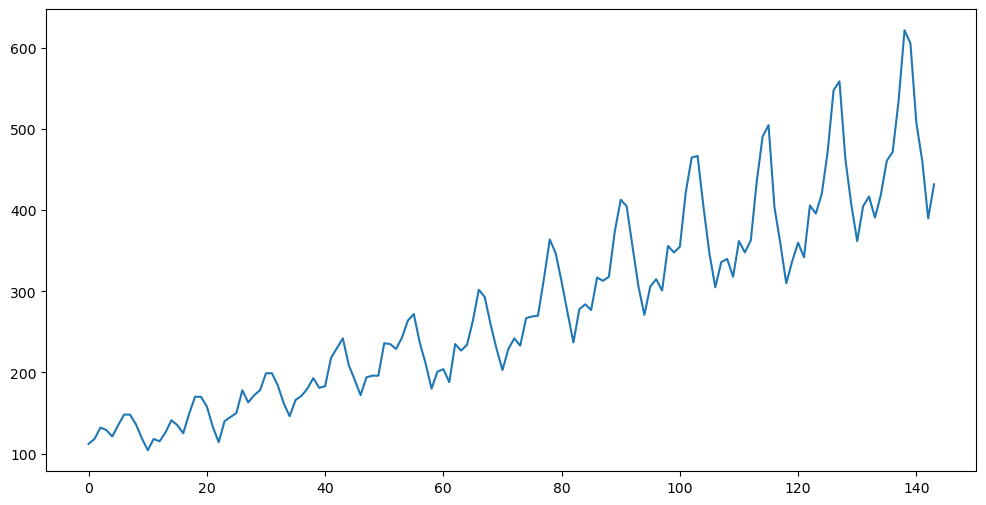

In [16]:
df['#Passengers'].plot()

<AxesSubplot:>

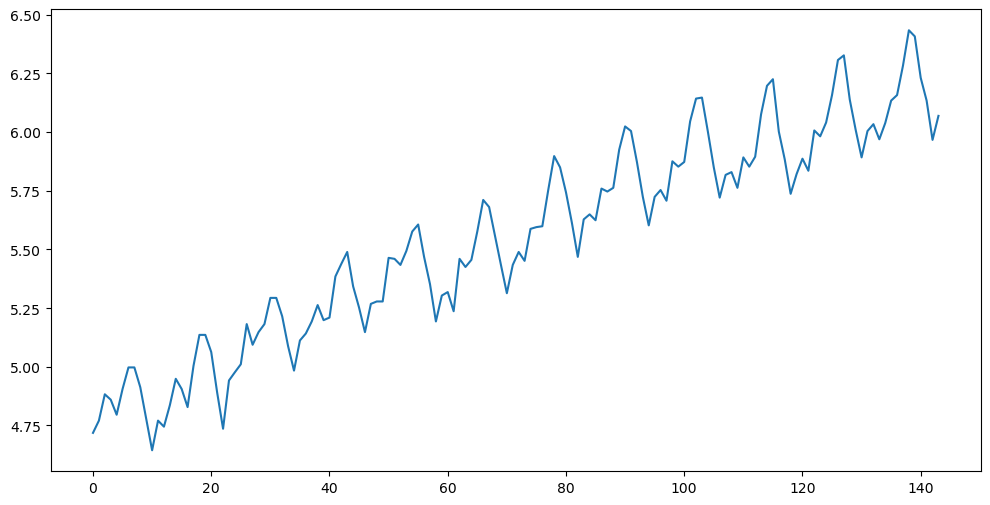

In [17]:
df['adj_log'].plot()

<AxesSubplot:>

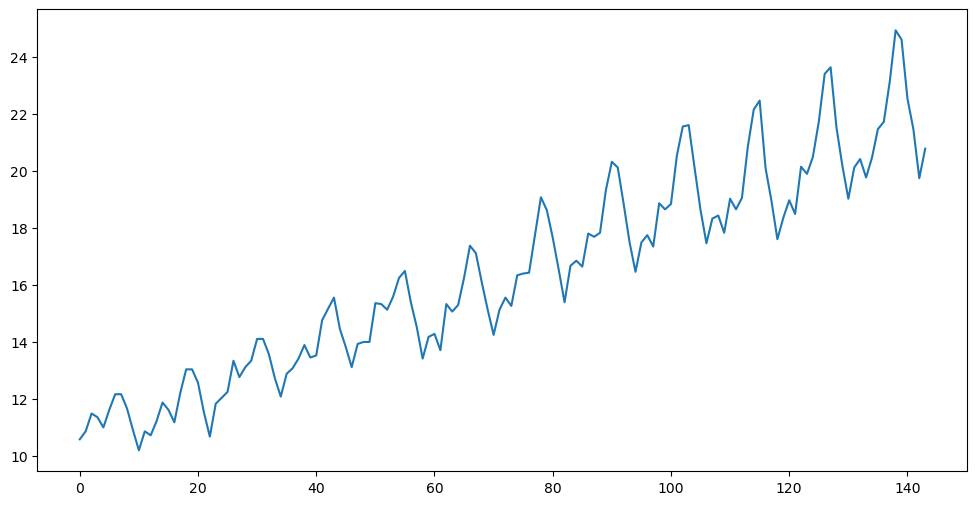

In [18]:
df['adj_sqrt'].plot()

<AxesSubplot:>

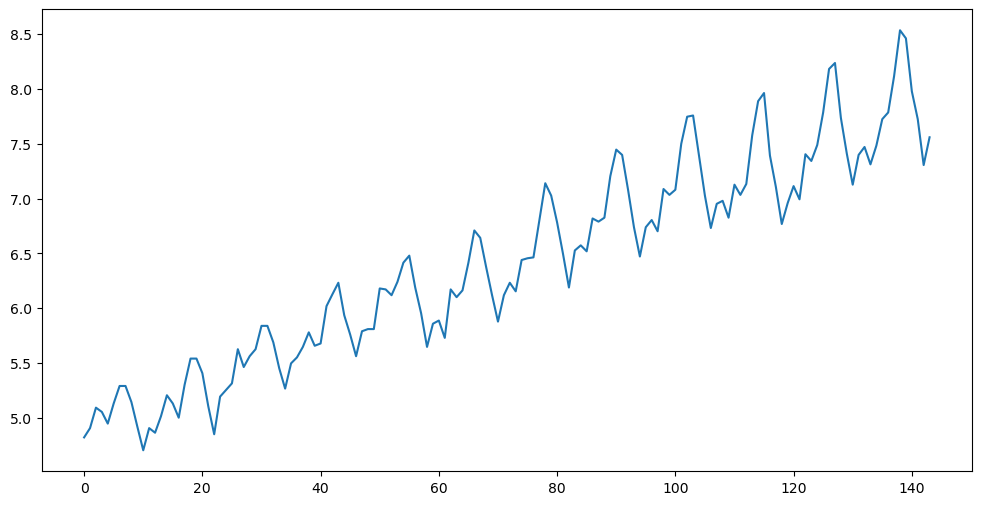

In [19]:
df['adj_cbrt'].plot()

<AxesSubplot:>

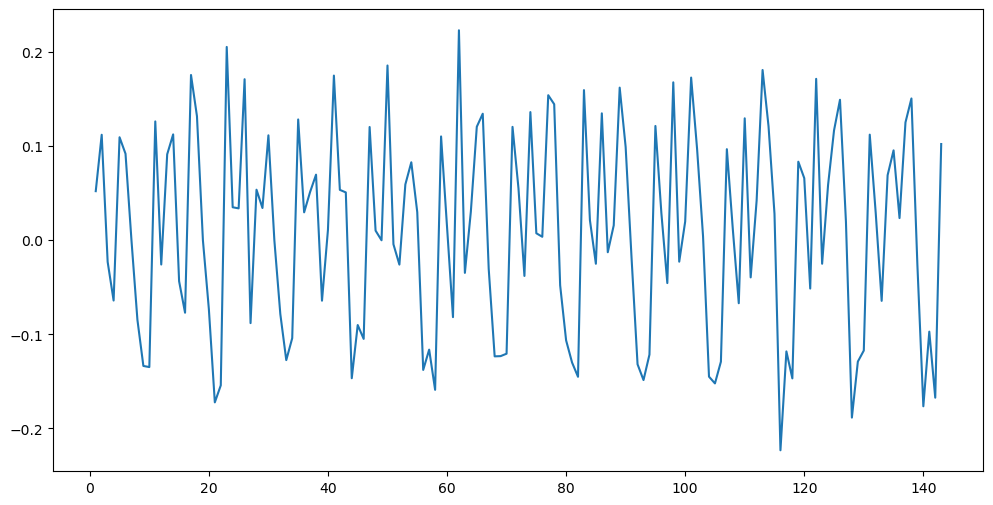

In [20]:
df['#Passengers_log_diff'] = df['adj_log'] - df['adj_log'].shift(1)
df['#Passengers_log_diff'].dropna().plot()

<AxesSubplot:>

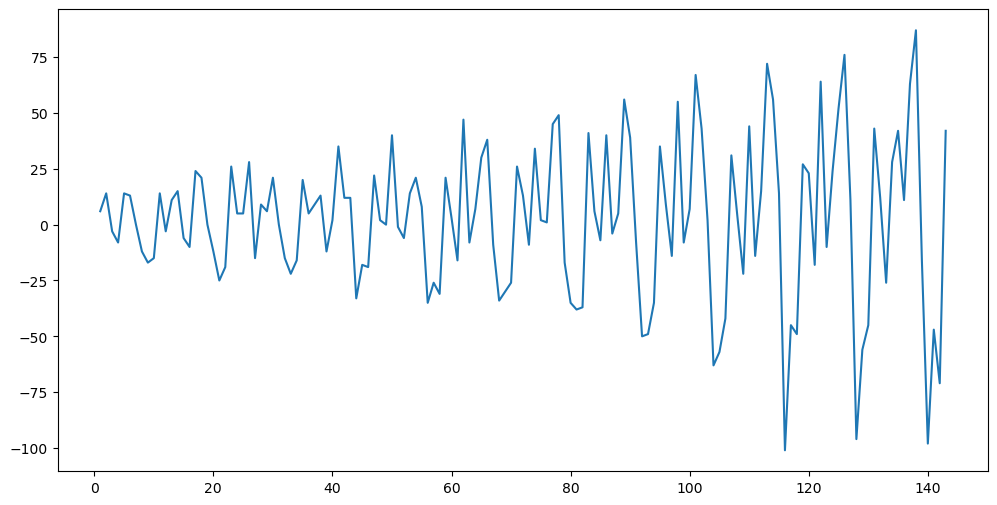

In [21]:
df['#Passengers_diff'].dropna().plot()

<AxesSubplot:>

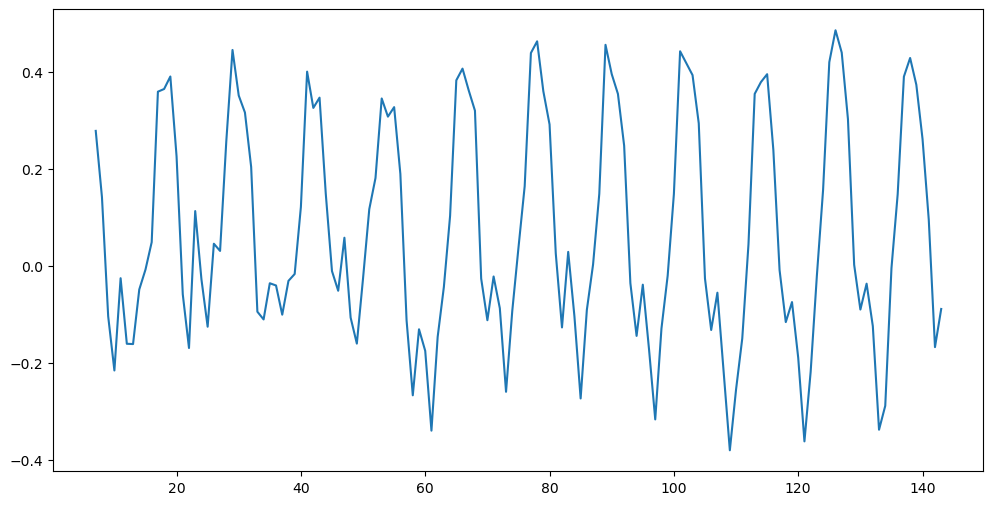

In [22]:
df['#Passengers_log_diff_7'] = df['adj_log'] - df['adj_log'].shift(7)
df['#Passengers_log_diff_7'].dropna().plot()

<AxesSubplot:>

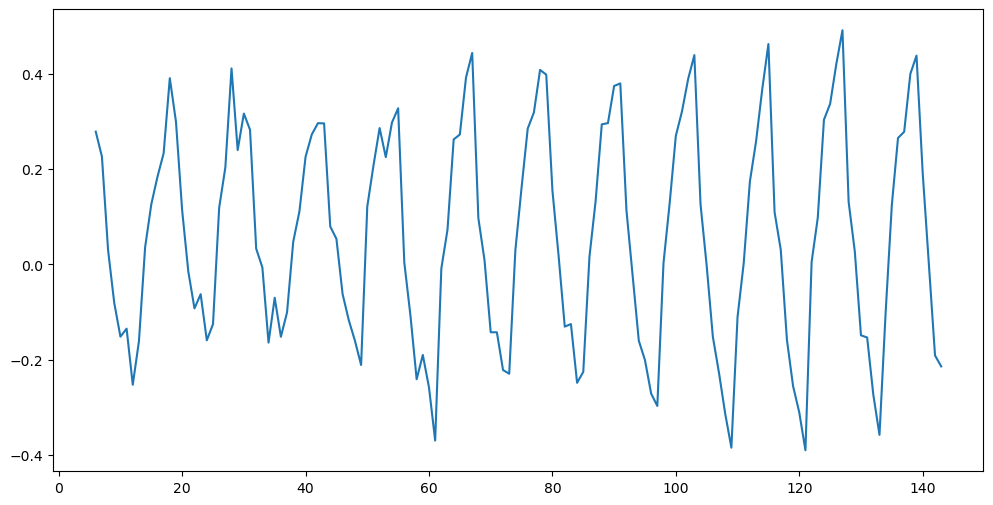

In [23]:
df['#Passengers_log_diff_6'] = df['adj_log'] - df['adj_log'].shift(6)
df['#Passengers_log_diff_6'].dropna().plot()

<AxesSubplot:>

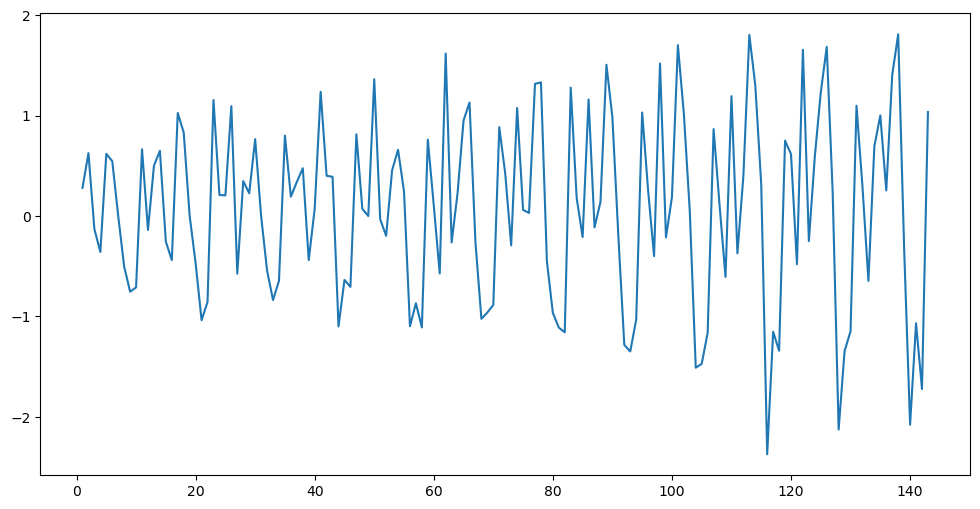

In [24]:
df['#Passengers_sqrt_diff'] = df['adj_sqrt'] - df['adj_sqrt'].shift(1)
df['#Passengers_sqrt_diff'].dropna().plot()

It is not guaranteed that new time serieses would be stationary. It should be tested

## Testing stationarity wtih Adfuller Test

In [25]:
adfuller_result = adfuller(df['#Passengers_log_diff'].dropna().values, autolag='AIC')

print(f'ADF Statistic: {adfuller_result[0]}')
print(f'p-value: {adfuller_result[1]}')

for key, value in adfuller_result[4].items():
    print('Critical Values:')
    print(f'\t{key}, {value}')

ADF Statistic: -2.717130598388133
p-value: 0.07112054815085875
Critical Values:
	1%, -3.4825006939887997
Critical Values:
	5%, -2.884397984161377
Critical Values:
	10%, -2.578960197753906


In [26]:
adfuller_result = adfuller(df['#Passengers_log_diff_7'].dropna().values, autolag='AIC')

print(f'ADF Statistic: {adfuller_result[0]}')
print(f'p-value: {adfuller_result[1]}')

for key, value in adfuller_result[4].items():
    print('Critical Values:')
    print(f'\t{key}, {value}')

ADF Statistic: -3.244627156510566
p-value: 0.017542511936230933
Critical Values:
	1%, -3.4846672514209773
Critical Values:
	5%, -2.8853397507076006
Critical Values:
	10%, -2.5794629869786503


In [27]:
adfuller_result = adfuller(df['#Passengers_log_diff_6'].dropna().values, autolag='AIC')

print(f'ADF Statistic: {adfuller_result[0]}')
print(f'p-value: {adfuller_result[1]}')

for key, value in adfuller_result[4].items():
    print('Critical Values:')
    print(f'\t{key}, {value}')

ADF Statistic: -3.2655285264838145
p-value: 0.016491446253817255
Critical Values:
	1%, -3.4816817173418295
Critical Values:
	5%, -2.8840418343195267
Critical Values:
	10%, -2.578770059171598


For features #Passengers_log_diff_7 and #Passengers_log_diff_6 p-value is lower than 0.05, so the null-hypothesis that these time serieses are non-stationary could be rejected

# Method 3 - Rolling statistics

In [28]:
df['#MA20'] = df['#Passengers'].rolling(window=20).mean()

<AxesSubplot:>

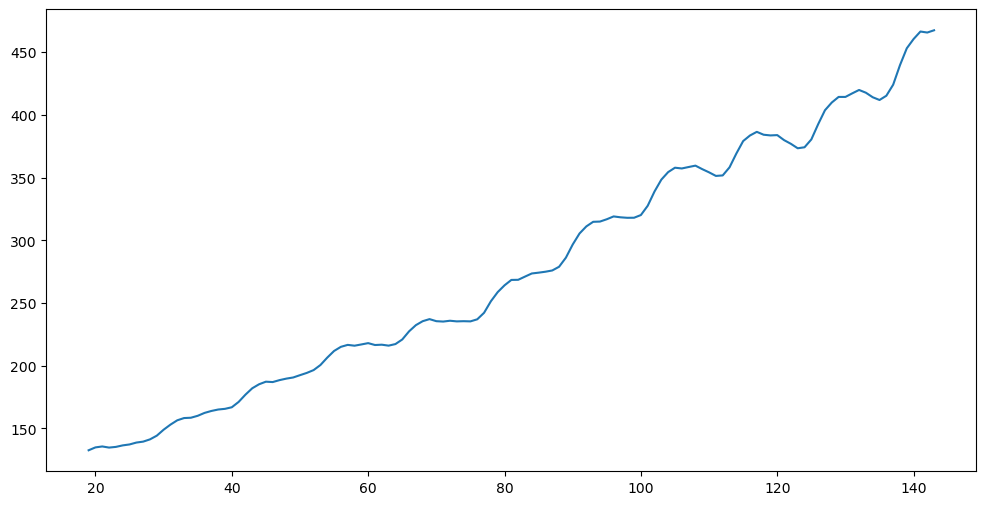

In [29]:
df['#MA20'].dropna().plot()

<AxesSubplot:>

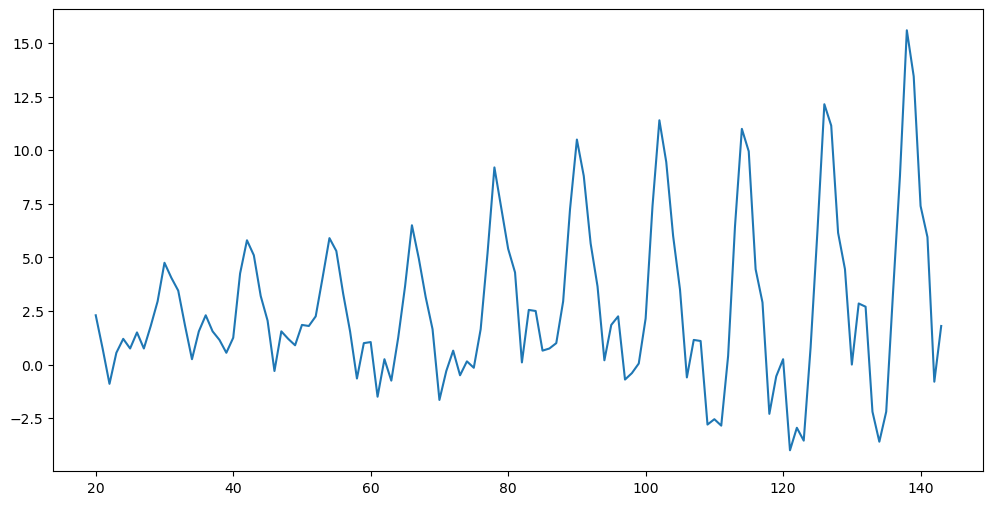

In [30]:
df['#MA20_diff'] = df['#MA20'] - df['#MA20'].shift(1)
df['#MA20_diff'].dropna().plot()

<AxesSubplot:>

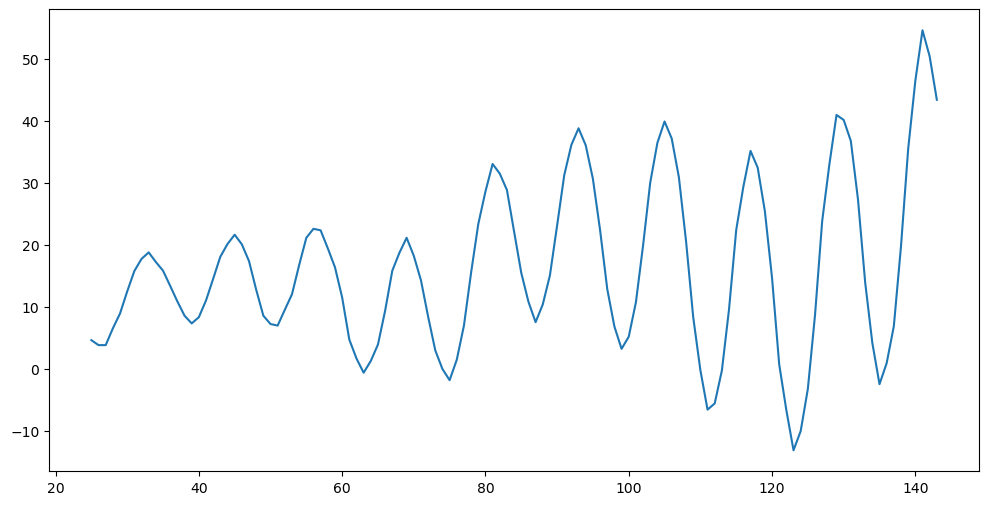

In [31]:
df['#MA20_diff_6'] = df['#MA20'] - df['#MA20'].shift(6)
df['#MA20_diff_6'].dropna().plot()

In [32]:
adfuller_result = adfuller(df['#MA20_diff'].dropna().values, autolag='AIC')

print(f'ADF Statistic: {adfuller_result[0]}')
print(f'p-value: {adfuller_result[1]}')

for key, value in adfuller_result[4].items():
    print('Critical Values:')
    print(f'\t{key}, {value}')

ADF Statistic: -2.9081027244008593
p-value: 0.04441384175982625
Critical Values:
	1%, -3.4912451337340342
Critical Values:
	5%, -2.8881954545454547
Critical Values:
	10%, -2.5809876033057852


In [33]:
adfuller_result = adfuller(df['#MA20_diff_6'].dropna().values, autolag='AIC')

print(f'ADF Statistic: {adfuller_result[0]}')
print(f'p-value: {adfuller_result[1]}')

for key, value in adfuller_result[4].items():
    print('Critical Values:')
    print(f'\t{key}, {value}')

ADF Statistic: -3.0656734889727426
p-value: 0.029200017560224008
Critical Values:
	1%, -3.492995948509562
Critical Values:
	5%, -2.888954648057252
Critical Values:
	10%, -2.58139291903223


#MA20_diff and #MA20_diff_6 could be used as stationary

<AxesSubplot:>

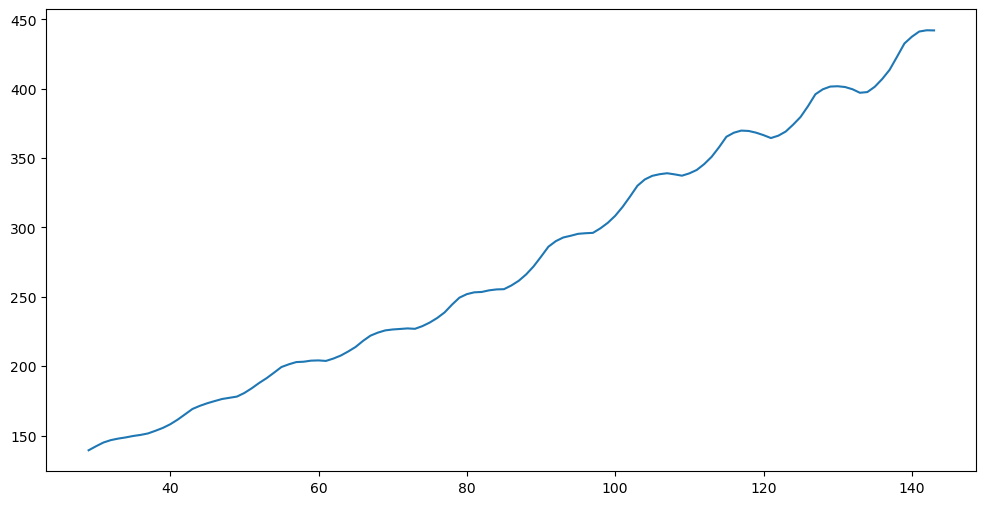

In [34]:
df['#MA30'] = df['#Passengers'].rolling(window=30).mean()
df['#MA30'].dropna().plot()

#MA30 is smoother than #MA20. It is because when we take more TS values into considerations, the local fluctuations go away